In [1]:
import pandas as pd
from io import StringIO
import matplotlib.pyplot as plt
import numpy as np
from numpy import NaN

from scipy.signal import find_peaks

import matplotlib
from pylab import rcParams
#%matplotlib widget, camera ready submission problem
matplotlib.rc('pdf', fonttype=42)
matplotlib.rcParams['savefig.dpi'] = 300
rcParams.update({'figure.autolayout': True})

def readfile(filename):
    types = {'frequency': float,'power': float}
    df = pd.read_csv(filename, skiprows=0, header=None, error_bad_lines=False, delim_whitespace=False, delimiter=' ')
    df.columns = ['frequency', 'power']
    df.dropna(inplace=True)
    #print(df.describe())
    return df

In [2]:
# Read data
Freq = [100, 250, 500, 1000, 2500, 5000, 10000]
# Manually calibrate peak index for the case when tag signal is weak
Index = [[1,2], [1,2], [1,2], [1,2], [1,2], [1,2], [3,4], [1,2], [3,4], [1,6]]
Power = []
for idx in range(7):
    path = './experiment3/i' + str(idx+1)
    filename = '/data0'
    df = readfile(path + filename + ".csv")
    
    x = df['power'].to_numpy()
    peaks, _ = find_peaks(x)
    a = sorted(x[peaks])[::-1]
#     Power.append((a[Index[idx][0]] + a[Index[idx][0]])/2)
    Power.append((a[1] + a[2])/2)

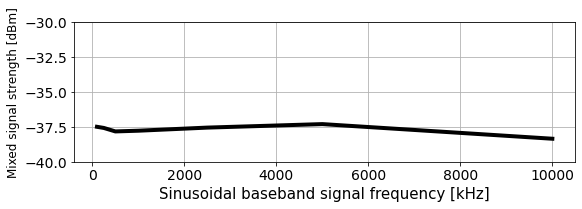

In [5]:
from pylab import rcParams
rcParams['figure.figsize'] = 8, 3
fig, ax1 = plt.subplots(1)

ax1.plot(Freq, Power, color='black', linewidth=4)
ax1.set_xlabel('Sinusoidal baseband signal frequency [kHz]', fontsize=15)
ax1.set_ylabel('Mixed signal strength [dBm]', fontsize=12)
ax1.tick_params(labelsize=14)
ax1.set_ylim([-40, -30])
ax1.grid()

plt.tight_layout()
plt.savefig('./figures/mixer_freq.pdf')